In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString, LinearRing, MultiLineString

In [7]:
# load data and crs
coor = pd.read_csv('station_coordinate.csv')
coor_geo = gpd.GeoDataFrame(coor, geometry=gpd.points_from_xy(coor['lng'], coor['lat']))
coor_geo.crs = {'init':'epsg:4326'}

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
# subway no, name, line dataframe

with open('../Subway_base_network/seoul.txt', 'r', encoding = "UTF-8") as file:
    S = file.read().split('\n')
    
subway = {'no':[], 'name':[], 'line':[]}
for i,x in enumerate(S):
    if i == 705: # end of the (no, name, line) pair
        break

    no, name, line = x.split()
    subway['no'].append(no)
    subway['name'].append(name)
    subway['line'].append(line)

subway = pd.DataFrame(subway)
subway

,no,name,line
0,100,소요산,1
1,101,동두천,1
2,102,보산,1
3,103,동두천중앙,1
4,104,지행,1
...,...,...,...
700,Y120,운동장.송담대,Y1
701,Y121,고진,Y1
702,Y122,보평,Y1
703,Y123,둔전,Y1


In [12]:
# replace station name
replace_dict = {'서울':'서울역'}

coor_geo = coor_geo.replace(replace_dict)

In [127]:
# find the 'no' which corresponds to 'name'

def add_no(coor, subway):
    no_list = []
    for i in range(coor.shape[0]):    # find the 'no' which corresponds to 'name'    
        no = subway.loc[subway['name'] == coor['name'][i]]['no']    
        if no.empty: # if 'no' cannot be found, append na        
            no_list.append(pd.NA)    
        else:        
            no_list.append(no.iloc[0])# add column in df
    coor['no'] = no_list

    # sort by no
    coor.sort_values('no', inplace=True)
    coor.reset_index(drop=True, inplace=True)

    return coor

In [128]:
# 1호선(line 1)

## add no
subway_1 = subway.loc[subway['line'] == '1']
coor_1 = coor_geo.loc[coor_geo['line'] == '01호선']

line1 = add_no(coor_1, subway_1)


## divide by line

line1_main = line1.iloc[:62].reset_index(drop=True)
line1_main_p = line1.iloc[[41,62]].reset_index(drop=True)
line1_P = line1.iloc[62:].drop(index=[65,79]).reset_index(drop=True) # 65 for 광명 # 79 for 서동탄
line1_GM = line1.iloc[[64,65]].reset_index(drop=True)
line1_SDT = line1.iloc[[78,79]].reset_index(drop=True)

## make geodf
line1_list = [line1_main, line1_main_p, line1_P, line1_GM, line1_SDT]
line1_df = gpd.GeoDataFrame({'line':[1,1,1,1,1], 'geometry':[LineString(x['geometry']) for x in line1_list]})

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-127-2014ed18e1b6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


In [132]:
for i in range(coor_2.shape[0]):   # find the 'no' which corresponds to 'name'  
    print(i)  
    no = subway_2.loc[subway_2['name'] == coor_2['name'][i]]['no']    
    if no.empty: # if 'no' cannot be found, append na        
        no_list.append(pd.NA)    
    else:        
        no_list.append(no.iloc[0])# add column in df

KeyError: 0

In [129]:
# 2호선 (line 2)

## add no
subway_2 = subway.loc[subway['line'] == '2']
coor_2 = coor_geo.loc[coor_geo['line'] == '02호선']

line2 = add_no(coor_2, subway_2)
line2

KeyError: 0

<AxesSubplot:>

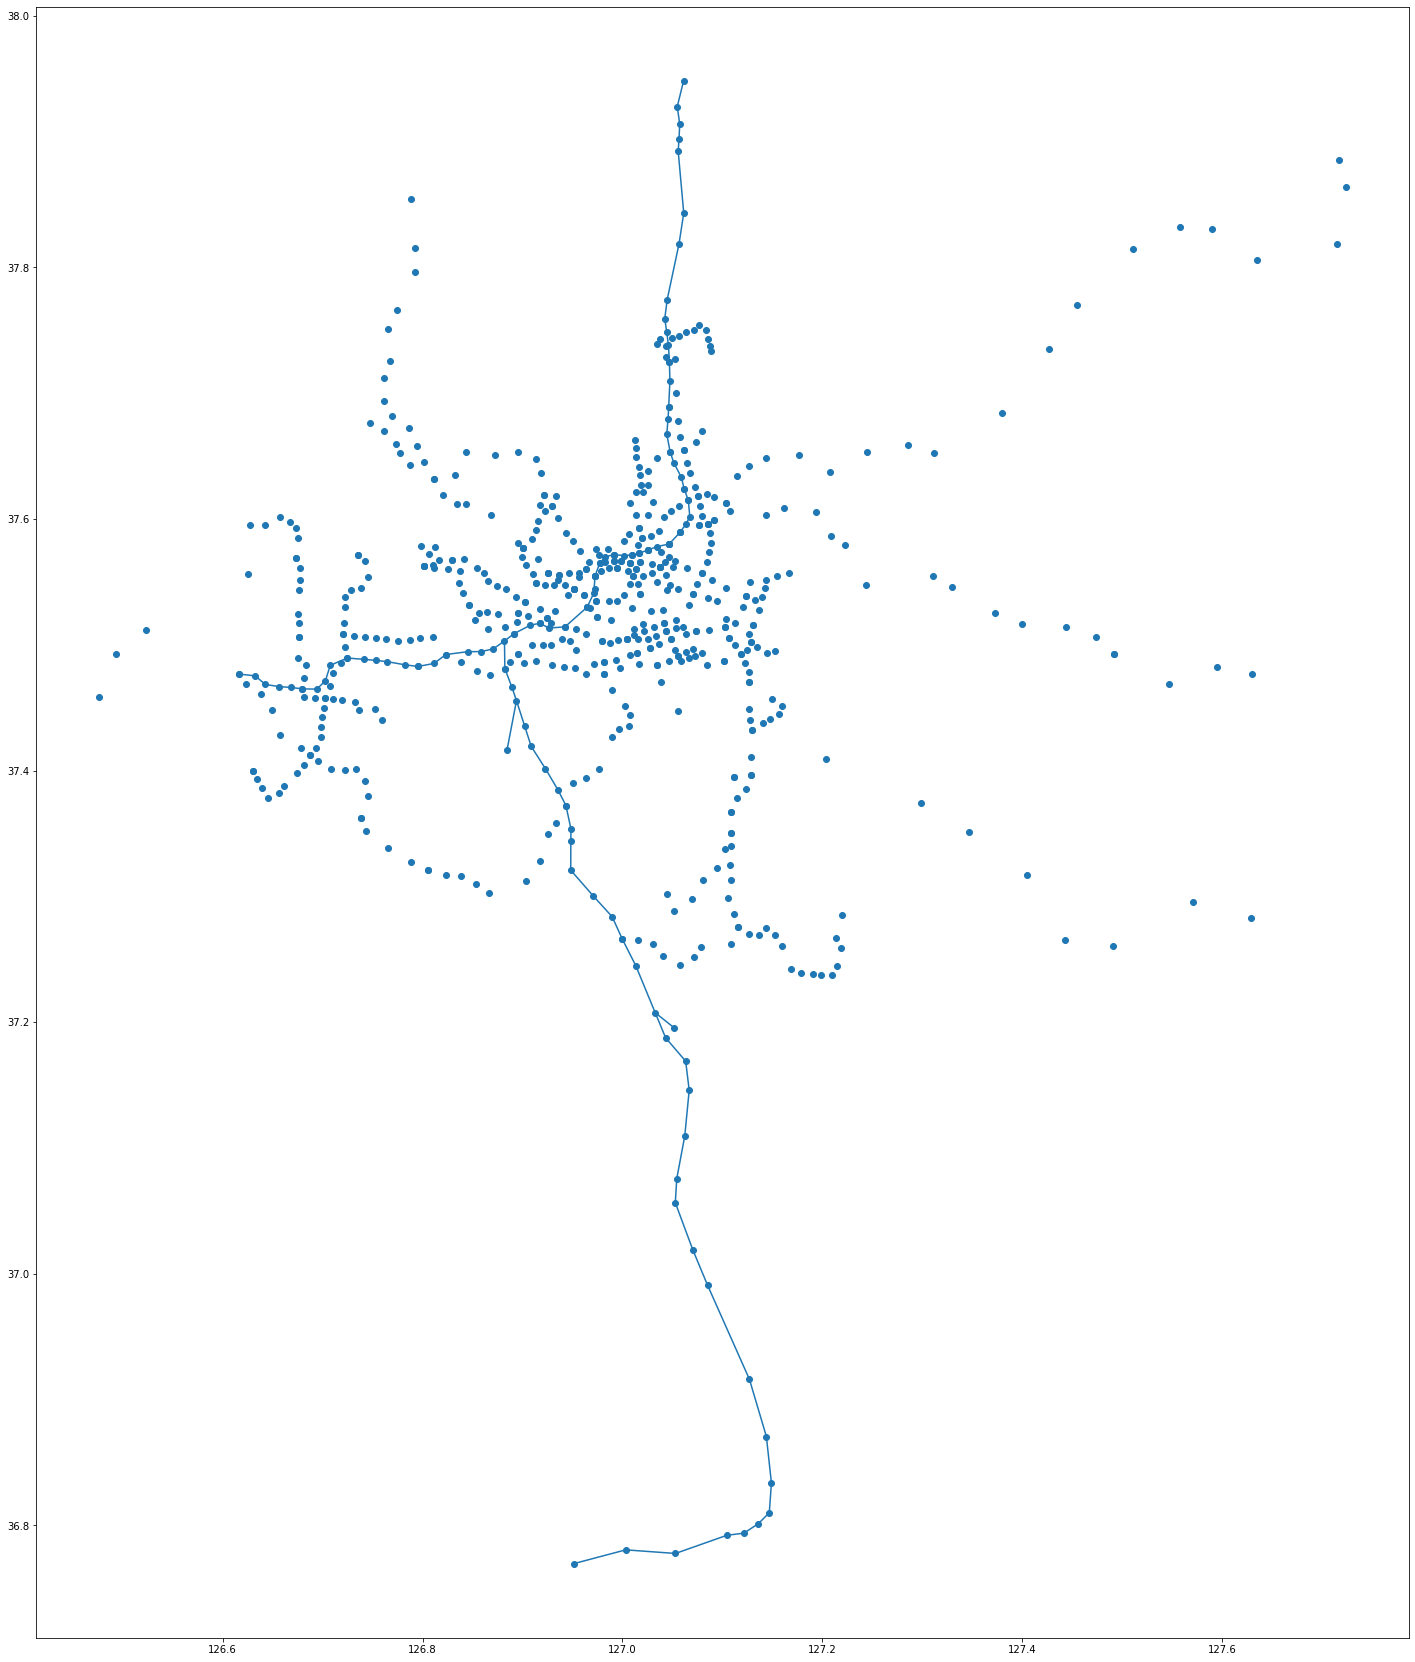

In [125]:
# plot
ax = line1_df.plot(figsize=(30,30))
coor_geo['geometry'].plot(ax=ax)

In [172]:
# check nas
print(coor_geo[coor_geo['lat'].isna()]['name'], coor_geo[coor_geo['lat'].isna()]['line']) # same with the case of lng

# drop na
#drop_index = coor_geo[coor_geo['lat'].isna()].index
#coor_geo.drop(index=drop_index, inplace=True)

244          미사
245        하남풍산
401        석촌고분
403        송파나루
404        한성백제
406        둔촌오륜
411          삼전
412      중앙보훈병원
495         임진강
542    인천공항1터미널
543    인천공항2터미널
545          양촌
546          구래
547          마산
548          장기
549          운양
550        걸포북변
551          사우
552          풍무
553          고촌
593         소새울
594        시흥대야
595          신천
596          신현
597        시흥시청
598        시흥능곡
599          달미
600          선부
602          원곡
603          원시
Name: name, dtype: object 244      05호선
245      05호선
401      09호선
403      09호선
404      09호선
406      09호선
411      09호선
412      09호선
495       경의선
542      공항철도
543      공항철도
545    김포도시철도
546    김포도시철도
547    김포도시철도
548    김포도시철도
549    김포도시철도
550    김포도시철도
551    김포도시철도
552    김포도시철도
553    김포도시철도
593       서해선
594       서해선
595       서해선
596       서해선
597       서해선
598       서해선
599       서해선
600       서해선
602       서해선
603       서해선
Name: line, dtype: object


(37.4, 37.7)

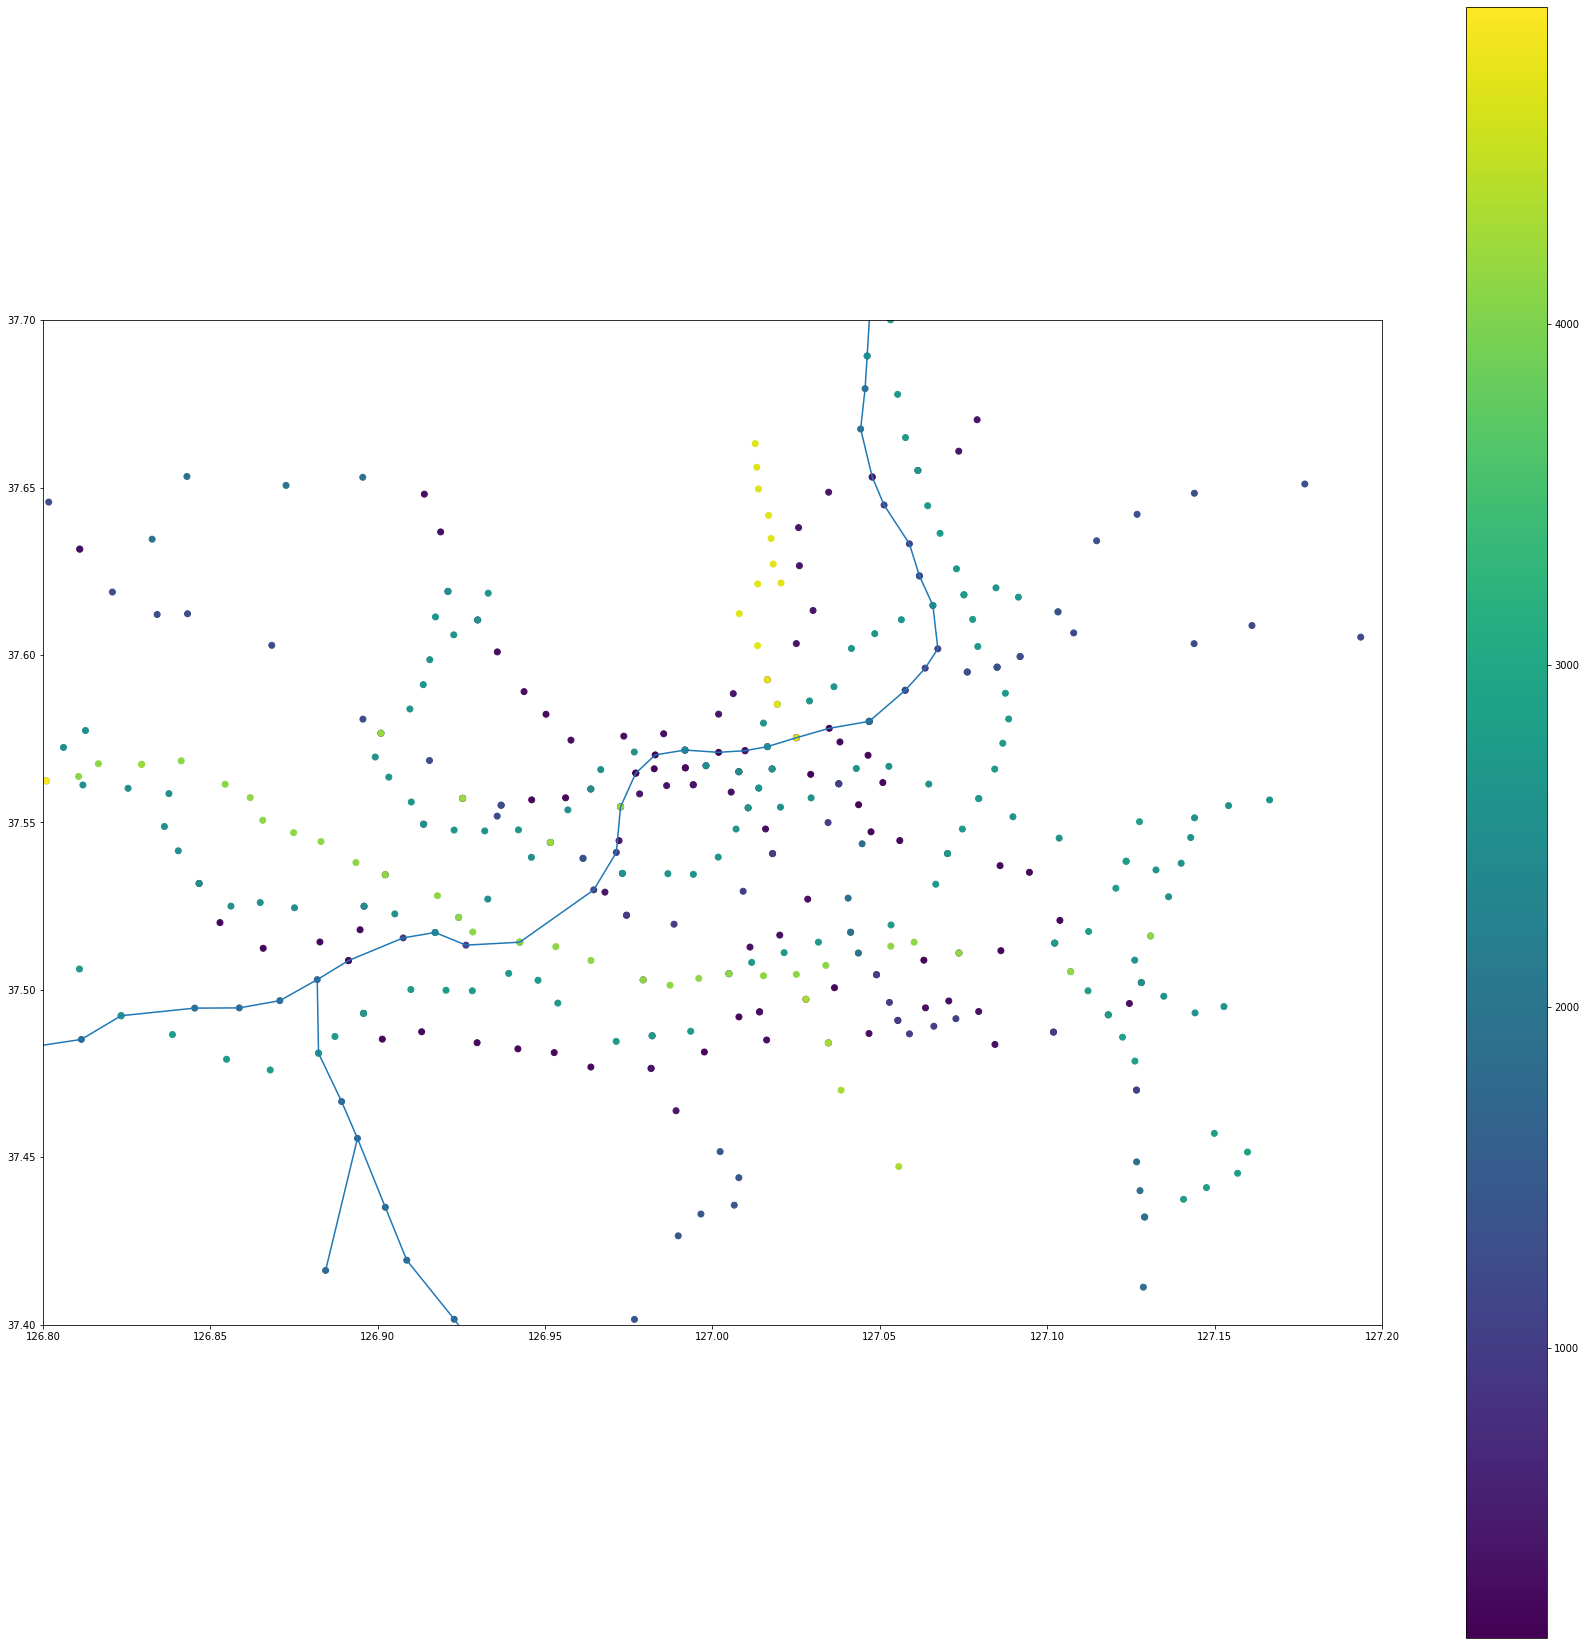

In [108]:
# plot
fig, ax = plt.subplots(figsize=(30,30))
coor_geo.plot(column='code', legend=True, ax=ax)
line1_df.plot(ax=ax)
# 126.8, 127.2 # 37.4, 37.7
ax.set_xlim(126.8, 127.2)
ax.set_ylim(37.4, 37.7)